## Center distribution (Figure 9)

We are studying the center distribution.

In [2]:
# Import modules
import sys, h5py
import numpy as np
%matplotlib inline

# Import modules from src directory
sys.path.append("../src")
import plotting

### 1. Loading data from file

In [13]:
results_filename = '../analysis/results/results.h5'
with h5py.File(results_filename, 'r') as f:
    diameter  = f['diameter'][:]
    intensity = f['intensity'][:]
    centerx   = f['centerx'][:]
    centery   = f['centery'][:]
    hitscore  = f['npeaks'][:]
    time      = f['time_s'][:]
    injectorx = f['injector_posx'][:]
    injectorz = f['injector_posz'][:]

### 2. Converting units

In [14]:
# Correct for detector efficiency
intensity *= (1./0.955)

# Intensity in Nr. of photons
h = 6.62606957e-34 #Js
c = 299792458 #m/s
hc = h*c  #Jm
wavelength  = 0.22621e-9 #[m]
intensity_NrPhum2 = ((intensity / 1000.) * wavelength) / (hc)
intensity_NrPh    = intensity_NrPhum2 * np.pi * (1e-3*diameter/2.)**2
intensity = intensity_NrPhum2

### 3. Plotting

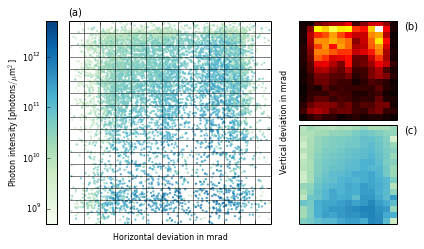

In [21]:
plot = plotting.Plot(fontsize=8, cols=3, rows=2, exclude=[0,1,3,4], 
                           axes_visible=False, colorbar=True, colorbar_left=True, save_pdf=True)
plot.add_axes((0,0), 2, 2, padx=-0.05)
plot.xlabel = [r'', r'', r'Horizontal deviation in mrad']
plot.ylabel = [r'', r'', r'Vertical deviation in mrad']
plot.title_label = 3*['']
plot.colorbar_label = r'Photon intensity [photons$/\mu$m$^2$]'
plot.set_axes_layout(plot.axes[0], visible=False)
plot.set_axes_layout(plot.axes[1], visible=False)
plot.plotting_a_heatmap(0, centerx - 0.018, centery - 0.008,
                        [(-0.6,0.7), (-1.3,0.4)], bins=[13, 17], cmaplist=['hot'], log=False)
plot.axes[0].text(0.8, 0.4, '(b)', va='top', ha='left', fontsize=10)
plot.plotting_a_meanmap(1, centerx - 0.018, centery - 0.008,
                        intensity, [(-0.6,0.7), (-1.3,0.4)], bins=[13, 17], cmaplist=['GnBu'], 
                        vmin=5e8, vmax=5e12, log=True)
plot.axes[1].text(0.8, 0.4, '(c)', va='top', ha='left', fontsize=10)
plot.plotting_correlation3d(2, centerx - 0.018, centery - 0.008,
                            intensity, cmap='GnBu', alpha=0.8, ms=5, scale_size=False, xlim=[-0.6,0.7],
                            ylim=[-1.3,0.4], vmin=5e8, vmax=5e12, log=True)
plot.set_colorbar_layout(tickpos='left', direction='in', pad=5, labelpad=-50, ticks=None, color='black', 
                         ticklabels=None)
[plot.axes[2].axvline(i, color='k', ls='-', lw=0.5, alpha=1) for i in np.arange(-0.5,0.7,0.1)]
[plot.axes[2].axhline(i, color='k', ls='-', lw=0.5, alpha=1) for i in np.arange(-1.3,0.4,0.1)]
plot.axes[2].yaxis.tick_right()
plot.axes[2].yaxis.set_label_position("right")
plot.axes[2].set_xticklabels([])
plot.axes[2].set_yticklabels([])
plot.axes[2].text(-0.6, 0.52, '(a)', va='top', ha='left', fontsize=10)

#plot.save('/Users/benedikt/phd-project/documentation/manuscripts/omrv-paper/manuscript/figures/fig_center_distribution.pdf')
plot.show()  

**Figure 9.**
Map of local phase deviations of the wavefront in the focus of the X-ray beam.                                                                                            
(a) Relative vertical/horizontal deviations from a planar wavefront with                                                                                                           
estimated photon intensity coded in color. The horizontal axis spans 1.3 mrad and the vertical                                                                                     
axis spans 1.7 mrad. Each box on the grid has dimensions $0.1\times0.1$~mrad.                                                                                                      
(b) 2D histogram showing the number of events in each box (black = 0, white = 180).                                                                                                
(c) Map of average photon intensity inside each box coded according to color scale on the left.